# Energy consumption for ID 11

In [45]:
#Import libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

In [46]:
opsd_daily=pd.read_csv("../dataset/2012_2013_gc_customerID_11.csv", parse_dates=True, index_col="date")
weather=pd.read_csv("../dataset/2012-2013_weather_final.csv", parse_dates=True)

In [47]:
print(opsd_daily.shape)
print(weather.shape)

(17519, 1)
(17519, 15)


In [48]:
opsd_daily.head()

value
date                      
2012-07-01 00:30:00  0.567
2012-07-01 01:00:00  0.547
2012-07-01 01:30:00  0.613
2012-07-01 02:00:00  0.519
2012-07-01 02:30:00  0.314

In [49]:
weather.head()

zip_code                 date  temperature  apparentTemperature  \
0      2026  2012-07-01 00:30:00        10.77                10.77   
1      2026  2012-07-01 01:00:00        10.21                10.21   
2      2026  2012-07-01 01:30:00        10.21                10.21   
3      2026  2012-07-01 02:00:00         9.48                 9.48   
4      2026  2012-07-01 02:30:00         9.48                 9.48   

   precipIntensity  precipProbability  dewPoint  humidity  pressure  \
0              0.0                0.0      5.48      0.70    1014.8   
1              0.0                0.0      5.52      0.73       0.0   
2              0.0                0.0      5.52      0.73       0.0   
3              0.0                0.0      5.22      0.75       0.0   
4              0.0                0.0      5.22      0.75       0.0   

   windSpeed  windGust  windBearing  uvIndex  cloudCover  visibility  
0       0.75      0.75          294        0        0.78       9.988  
1       0.21      0.61          289        0        1.00       0.000  
2       0.21      0.61          289        0        1.00       0.000  
3       0.33      0.95          284        0        0.88       0.000  
4       0.33      0.95          284        0        0.88       0.000

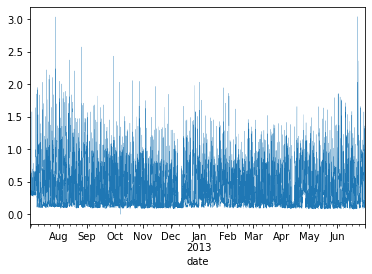

In [50]:
opsd_daily['value'].plot(linewidth=0.2);

In [51]:
# Add columns with year, month, and weekday name
opsd_daily['Year'] = opsd_daily.index.year
opsd_daily['Month'] = opsd_daily.index.month
opsd_daily['Weekday Name'] = opsd_daily.index.day_name()

# Display a random sampling of 5 rows
opsd_daily.sample(5, random_state=0)

value  Year  Month Weekday Name
date                                                
2012-11-04 17:30:00  0.304  2012     11       Sunday
2012-12-12 04:30:00  0.163  2012     12    Wednesday
2013-04-26 09:00:00  0.360  2013      4       Friday
2012-11-14 07:00:00  0.315  2012     11    Wednesday
2012-07-16 09:00:00  0.287  2012      7       Monday

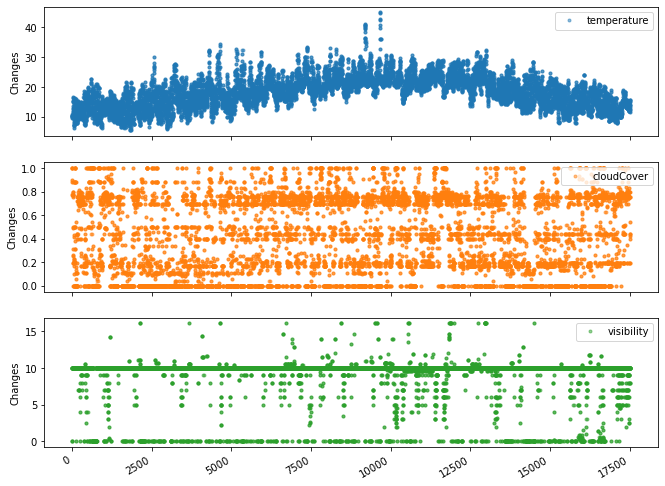

In [52]:
cols_plot = ['temperature', 'cloudCover', 'visibility']
axes = weather[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('Changes')

In [54]:
opsd_daily.reset_index(inplace=True)

In [56]:
weather.drop(columns=["zip_code"], inplace=True)

In [58]:
# opsd_daily
df=weather.merge(opsd_daily, on='date', how='left')

ValueError: You are trying to merge on object and datetime64[ns] columns. If you wish to proceed you should use pd.concat

In [ ]:
df.head()

date  temperature  apparentTemperature  precipIntensity  \
0  2012-07-01 00:30:00        10.77                10.77              0.0   
1  2012-07-01 01:00:00        10.21                10.21              0.0   
2  2012-07-01 01:30:00        10.21                10.21              0.0   
3  2012-07-01 02:00:00         9.48                 9.48              0.0   
4  2012-07-01 02:30:00         9.48                 9.48              0.0   

   precipProbability  dewPoint  humidity  pressure  windSpeed  windGust  \
0                0.0      5.48      0.70    1014.8       0.75      0.75   
1                0.0      5.52      0.73       0.0       0.21      0.61   
2                0.0      5.52      0.73       0.0       0.21      0.61   
3                0.0      5.22      0.75       0.0       0.33      0.95   
4                0.0      5.22      0.75       0.0       0.33      0.95   

   windBearing  uvIndex  cloudCover  visibility  value  
0          294        0        0.78       9.988  0.567  
1          289        0        1.00       0.000  0.547  
2          289        0        1.00       0.000  0.613  
3          284        0        0.88       0.000  0.519  
4          284        0        0.88       0.000  0.314

In [ ]:
df.set_index('date', inplace=True)

In [ ]:
df = df.rename(columns={'value':'GC'})

In [ ]:
df

temperature  apparentTemperature  precipIntensity  \
date                                                                     
2012-07-01 00:30:00        10.77                10.77           0.0000   
2012-07-01 01:00:00        10.21                10.21           0.0000   
2012-07-01 01:30:00        10.21                10.21           0.0000   
2012-07-01 02:00:00         9.48                 9.48           0.0000   
2012-07-01 02:30:00         9.48                 9.48           0.0000   
...                          ...                  ...              ...   
2013-06-30 21:30:00        12.70                12.70           0.0713   
2013-06-30 22:00:00        12.21                12.21           0.0056   
2013-06-30 22:30:00        12.21                12.21           0.0056   
2013-06-30 23:00:00        11.70                11.70           0.0000   
2013-06-30 23:30:00        11.70                11.70           0.0000   

                     precipProbability  dewPoint  humidity  pressure  \
date                                                                   
2012-07-01 00:30:00               0.00      5.48      0.70    1014.8   
2012-07-01 01:00:00               0.00      5.52      0.73       0.0   
2012-07-01 01:30:00               0.00      5.52      0.73       0.0   
2012-07-01 02:00:00               0.00      5.22      0.75       0.0   
2012-07-01 02:30:00               0.00      5.22      0.75       0.0   
...                                ...       ...       ...       ...   
2013-06-30 21:30:00               0.31     11.49      0.92    1024.7   
2013-06-30 22:00:00               0.04     11.12      0.93    1024.7   
2013-06-30 22:30:00               0.04     11.12      0.93    1024.7   
2013-06-30 23:00:00               0.00     10.52      0.92       0.0   
2013-06-30 23:30:00               0.00     10.52      0.92       0.0   

                     windSpeed  windGust  windBearing  uvIndex  cloudCover  \
date                                                                         
2012-07-01 00:30:00       0.75      0.75          294        0        0.78   
2012-07-01 01:00:00       0.21      0.61          289        0        1.00   
2012-07-01 01:30:00       0.21      0.61          289        0        1.00   
2012-07-01 02:00:00       0.33      0.95          284        0        0.88   
2012-07-01 02:30:00       0.33      0.95          284        0        0.88   
...                        ...       ...          ...      ...         ...   
2013-06-30 21:30:00       1.48      1.74          237        0        0.42   
2013-06-30 22:00:00       1.42      2.11          248        0        0.40   
2013-06-30 22:30:00       1.42      2.11          248        0        0.40   
2013-06-30 23:00:00       1.05      3.44          261        0        0.19   
2013-06-30 23:30:00       1.05      3.44          261        0        0.19   

                     visibility     GC  
date                                    
2012-07-01 00:30:00       9.988  0.567  
2012-07-01 01:00:00       0.000  0.547  
2012-07-01 01:30:00       0.000  0.613  
2012-07-01 02:00:00       0.000  0.519  
2012-07-01 02:30:00       0.000  0.314  
...                         ...    ...  
2013-06-30 21:30:00      10.003  0.404  
2013-06-30 22:00:00      10.003  0.747  
2013-06-30 22:30:00      10.003  0.656  
2013-06-30 23:00:00      10.003  0.291  
2013-06-30 23:30:00      10.003  0.230  

[17519 rows x 14 columns]

In [ ]:
df.isna().sum()

temperature            0
apparentTemperature    0
precipIntensity        0
precipProbability      0
dewPoint               0
humidity               0
pressure               0
windSpeed              0
windGust               0
windBearing            0
uvIndex                0
cloudCover             0
visibility             0
GC                     0
dtype: int64

In [ ]:
#Export into CSV
# df.to_csv("2012_2013_merged_customerID_11.csv")

## Modeling data

In [59]:
data = pd.read_csv("https://raw.githubusercontent.com/stardustd/Predict-energy-consumption/master/dataset/2012_2013_merged_customerID_11.csv",
               parse_dates=["date"],
               index_col="date")

In [60]:
data.head()

temperature  apparentTemperature  precipIntensity  \
date                                                                     
2012-07-01 00:00:00        10.77                10.77              0.0   
2012-07-01 00:30:00        10.77                10.77              0.0   
2012-07-01 01:00:00        10.21                10.21              0.0   
2012-07-01 01:30:00        10.21                10.21              0.0   
2012-07-01 02:00:00         9.48                 9.48              0.0   

                     precipProbability  dewPoint  humidity  pressure  \
date                                                                   
2012-07-01 00:00:00                0.0      5.48      0.70    1014.8   
2012-07-01 00:30:00                0.0      5.48      0.70    1014.8   
2012-07-01 01:00:00                0.0      5.52      0.73       0.0   
2012-07-01 01:30:00                0.0      5.52      0.73       0.0   
2012-07-01 02:00:00                0.0      5.22      0.75       0.0   

                     windSpeed  windGust  windBearing  uvIndex  cloudCover  \
date                                                                         
2012-07-01 00:00:00       0.75      0.75          294        0        0.78   
2012-07-01 00:30:00       0.75      0.75          294        0        0.78   
2012-07-01 01:00:00       0.21      0.61          289        0        1.00   
2012-07-01 01:30:00       0.21      0.61          289        0        1.00   
2012-07-01 02:00:00       0.33      0.95          284        0        0.88   

                     visibility     GC   GG  
date                                         
2012-07-01 00:00:00       9.988  0.353  0.0  
2012-07-01 00:30:00       9.988  0.567  0.0  
2012-07-01 01:00:00       0.000  0.547  0.0  
2012-07-01 01:30:00       0.000  0.613  0.0  
2012-07-01 02:00:00       0.000  0.519  0.0

In [61]:
data.shape

(17520, 15)

In [62]:
data["GG"].value_counts()

0.000    9185
0.001     197
0.002      79
0.003      74
0.005      66
         ... 
0.788       1
0.861       1
0.839       1
0.763       1
0.828       1
Name: GG, Length: 825, dtype: int64

In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17520 entries, 2012-07-01 00:00:00 to 2013-06-30 23:30:00
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   temperature          17520 non-null  float64
 1   apparentTemperature  17520 non-null  float64
 2   precipIntensity      17520 non-null  float64
 3   precipProbability    17520 non-null  float64
 4   dewPoint             17520 non-null  float64
 5   humidity             17520 non-null  float64
 6   pressure             17520 non-null  float64
 7   windSpeed            17520 non-null  float64
 8   windGust             17520 non-null  float64
 9   windBearing          17520 non-null  int64  
 10  uvIndex              17520 non-null  int64  
 11  cloudCover           17520 non-null  float64
 12  visibility           17520 non-null  float64
 13  GC                   17520 non-null  float64
 14  GG                   17520 non-null  float64
dtypes

In [64]:
# Basic statistics :

data.describe()

temperature  apparentTemperature  precipIntensity  precipProbability  \
count  17520.000000         17520.000000     17520.000000       17520.000000   
mean      18.237660            18.263350         0.148876           0.090576   
std        5.169219             5.420304         0.746871           0.209571   
min        5.450000             2.990000         0.000000           0.000000   
25%       14.370000            14.370000         0.000000           0.000000   
50%       18.290000            18.310000         0.000000           0.000000   
75%       21.710000            21.760000         0.021300           0.060000   
max       45.000000            45.670000        31.415000           1.000000   

           dewPoint      humidity      pressure     windSpeed      windGust  \
count  17520.000000  17520.000000  17520.000000  17520.000000  17520.000000   
mean      10.632348      0.633195    693.214041      3.031832      3.982727   
std        4.487578      0.154054    474.060931      1.828670      2.662988   
min       -4.400000      0.110000      0.000000      0.000000      0.000000   
25%        7.737500      0.530000      0.000000      1.570000      1.997500   
50%       10.870000      0.630000   1013.500000      2.750000      3.540000   
75%       13.620000      0.720000   1019.500000      4.230000      5.320000   
max       23.850000      0.960000   1033.500000     11.490000     20.720000   

        windBearing       uvIndex    cloudCover    visibility            GC  \
count  17520.000000  17520.000000  17520.000000  17520.000000  17520.000000   
mean     187.312443      1.322945      0.410481      9.159691      0.378977   
std      105.758347      2.289643      0.329263      2.645891      0.322034   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%       93.000000      0.000000      0.040000      9.988000      0.146000   
50%      191.000000      0.000000      0.400000     10.003000      0.245000   
75%      283.000000      2.000000      0.750000     10.003000      0.523000   
max      359.000000     12.000000      1.000000     16.093000      3.042000   

                 GG  
count  17520.000000  
mean       0.135781  
std        0.217528  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.206000  
max        0.879000

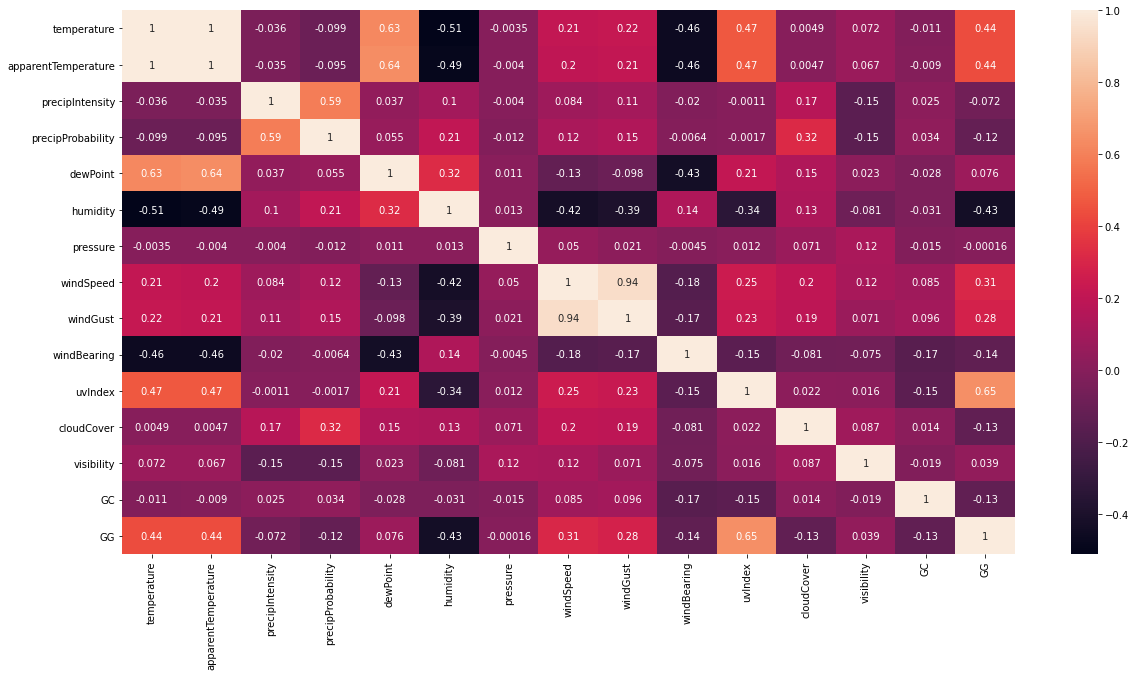

In [65]:
# Checking futures correlation

c = data.corr()

plt.subplots(figsize=(20,10))
sns.heatmap(c, annot=True)

In [66]:
c = data.corr()
abs(c['GC']).sort_values(ascending = False)

GC                     1.000000
windBearing            0.165555
uvIndex                0.147406
GG                     0.133866
windGust               0.096441
windSpeed              0.085491
precipProbability      0.033737
humidity               0.031266
dewPoint               0.027656
precipIntensity        0.024935
visibility             0.018991
pressure               0.014880
cloudCover             0.013899
temperature            0.010628
apparentTemperature    0.008980
Name: GC, dtype: float64

### To verify missing value percentage

In [67]:
100 * data.isnull().sum() / data.shape[0]

temperature            0.0
apparentTemperature    0.0
precipIntensity        0.0
precipProbability      0.0
dewPoint               0.0
humidity               0.0
pressure               0.0
windSpeed              0.0
windGust               0.0
windBearing            0.0
uvIndex                0.0
cloudCover             0.0
visibility             0.0
GC                     0.0
GG                     0.0
dtype: float64

There is no missing value

In [69]:
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

figure = go.Scatter(x=data.index,
                    y=data.GC,
                    name = "Evolution of consumption per month",
                    line = dict(color = 'blue'),
                    opacity = 0.5)

layout = dict(title="Evolution of consumption per month",)

fig = dict(data=[figure], layout=layout)
iplot(fig)

In [70]:
data.head()

temperature  apparentTemperature  precipIntensity  \
date                                                                     
2012-07-01 00:00:00        10.77                10.77              0.0   
2012-07-01 00:30:00        10.77                10.77              0.0   
2012-07-01 01:00:00        10.21                10.21              0.0   
2012-07-01 01:30:00        10.21                10.21              0.0   
2012-07-01 02:00:00         9.48                 9.48              0.0   

                     precipProbability  dewPoint  humidity  pressure  \
date                                                                   
2012-07-01 00:00:00                0.0      5.48      0.70    1014.8   
2012-07-01 00:30:00                0.0      5.48      0.70    1014.8   
2012-07-01 01:00:00                0.0      5.52      0.73       0.0   
2012-07-01 01:30:00                0.0      5.52      0.73       0.0   
2012-07-01 02:00:00                0.0      5.22      0.75       0.0   

                     windSpeed  windGust  windBearing  uvIndex  cloudCover  \
date                                                                         
2012-07-01 00:00:00       0.75      0.75          294        0        0.78   
2012-07-01 00:30:00       0.75      0.75          294        0        0.78   
2012-07-01 01:00:00       0.21      0.61          289        0        1.00   
2012-07-01 01:30:00       0.21      0.61          289        0        1.00   
2012-07-01 02:00:00       0.33      0.95          284        0        0.88   

                     visibility     GC   GG  
date                                         
2012-07-01 00:00:00       9.988  0.353  0.0  
2012-07-01 00:30:00       9.988  0.567  0.0  
2012-07-01 01:00:00       0.000  0.547  0.0  
2012-07-01 01:30:00       0.000  0.613  0.0  
2012-07-01 02:00:00       0.000  0.519  0.0

## Monthly data

In [74]:
july_data_2012 = data["2012-07"]
july_data_2012.head(5)

temperature  apparentTemperature  precipIntensity  \
date                                                                     
2012-07-01 00:00:00        10.77                10.77              0.0   
2012-07-01 00:30:00        10.77                10.77              0.0   
2012-07-01 01:00:00        10.21                10.21              0.0   
2012-07-01 01:30:00        10.21                10.21              0.0   
2012-07-01 02:00:00         9.48                 9.48              0.0   

                     precipProbability  dewPoint  humidity  pressure  \
date                                                                   
2012-07-01 00:00:00                0.0      5.48      0.70    1014.8   
2012-07-01 00:30:00                0.0      5.48      0.70    1014.8   
2012-07-01 01:00:00                0.0      5.52      0.73       0.0   
2012-07-01 01:30:00                0.0      5.52      0.73       0.0   
2012-07-01 02:00:00                0.0      5.22      0.75       0.0   

                     windSpeed  windGust  windBearing  uvIndex  cloudCover  \
date                                                                         
2012-07-01 00:00:00       0.75      0.75          294        0        0.78   
2012-07-01 00:30:00       0.75      0.75          294        0        0.78   
2012-07-01 01:00:00       0.21      0.61          289        0        1.00   
2012-07-01 01:30:00       0.21      0.61          289        0        1.00   
2012-07-01 02:00:00       0.33      0.95          284        0        0.88   

                     visibility     GC   GG  
date                                         
2012-07-01 00:00:00       9.988  0.353  0.0  
2012-07-01 00:30:00       9.988  0.567  0.0  
2012-07-01 01:00:00       0.000  0.547  0.0  
2012-07-01 01:30:00       0.000  0.613  0.0  
2012-07-01 02:00:00       0.000  0.519  0.0

In [75]:
# monthly_data = data.date.index.month
# Weekday_data =  data.date.index.day_name

In [76]:
july_data_2012.describe()

temperature  apparentTemperature  precipIntensity  precipProbability  \
count  1488.000000          1488.000000      1488.000000        1488.000000   
mean     12.748468            12.476788         0.050427           0.088481   
std       3.050275             3.450212         0.161090           0.194505   
min       6.240000             4.580000         0.000000           0.000000   
25%      10.467500            10.467500         0.000000           0.000000   
50%      12.465000            12.465000         0.000000           0.000000   
75%      14.792500            14.792500         0.018075           0.062500   
max      22.800000            22.800000         2.336300           1.000000   

         dewPoint     humidity     pressure    windSpeed     windGust  \
count  1488.00000  1488.000000  1488.000000  1488.000000  1488.000000   
mean      6.33996     0.661331   673.081855     3.307823     4.099019   
std       2.46301     0.113939   484.794558     1.607872     2.209429   
min       0.68000     0.350000     0.000000     0.000000     0.040000   
25%       4.43000     0.600000     0.000000     1.977500     2.327500   
50%       6.06000     0.680000  1016.650000     3.340000     4.035000   
75%       8.08250     0.720000  1025.100000     4.510000     5.495000   
max      15.04000     0.950000  1033.500000     8.050000    12.720000   

       windBearing      uvIndex   cloudCover   visibility           GC  \
count  1488.000000  1488.000000  1488.000000  1488.000000  1488.000000   
mean    242.905914     0.482527     0.470753     8.723707     0.448395   
std      81.616976     0.890639     0.338696     3.151707     0.382918   
min       0.000000     0.000000     0.000000     0.000000     0.098000   
25%     207.000000     0.000000     0.170000     9.988000     0.166000   
50%     256.000000     0.000000     0.500000     9.988000     0.318000   
75%     304.250000     1.000000     0.750000    10.003000     0.574500   
max     359.000000     3.000000     1.000000    14.314000     3.038000   

                GG  
count  1488.000000  
mean      0.095071  
std       0.156124  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       0.143250  
max       0.620000

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning:

Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.



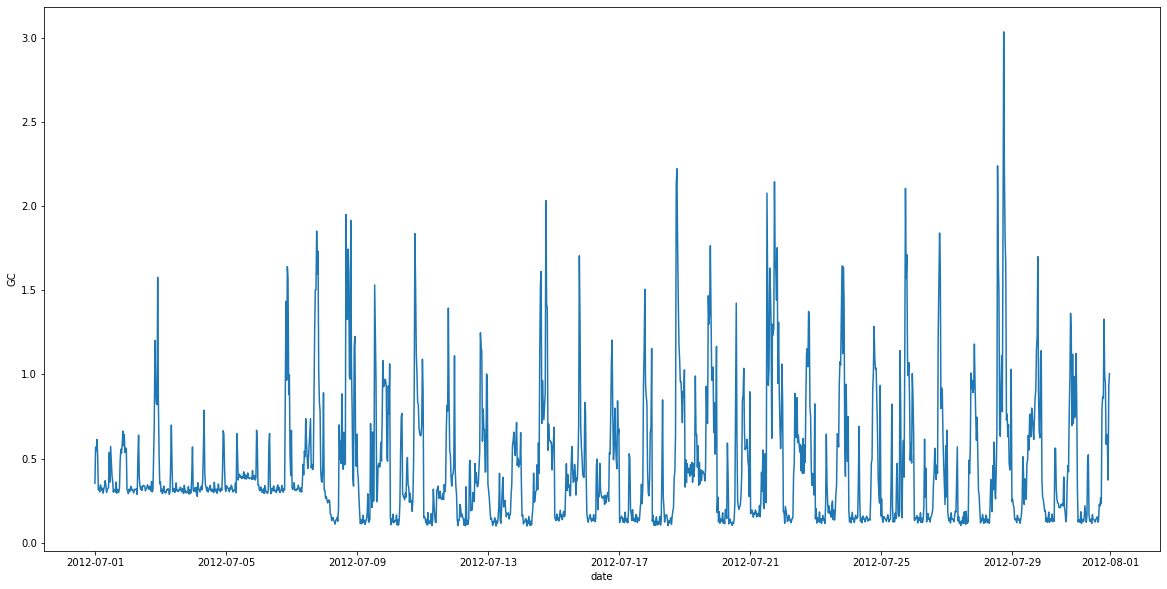

In [77]:
fig = plt.figure(figsize=(20,10))
sns.lineplot(x= july_data_2012.index, y="GC", data = july_data_2012)
fig.show()

In [78]:
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

figure = go.Scatter(x=july_data_2012.index,
                    y=july_data_2012.GC,
                    name = "Evolution of consumption per month",
                    line = dict(color = 'blue'),
                    opacity = 0.5)

layout = dict(title="Evolution of consumption per month",)

fig = dict(data=[figure], layout=layout)
iplot(fig)

In July there is more energy consumption for heating. (In Australia winter is in June, July, August)

In [80]:
fig = go.Figure([{
    'x': july_data_2012.index,
    'y': july_data_2012.GC,
    'name': col
}  for col in july_data_2012])

fig.show()

In [81]:
# Separate target variable Y from features X

target_name = 'GC'

Y = july_data_2012[target_name]
X = july_data_2012.drop(target_name, axis=1)

In [177]:
# # Convert pandas DataFrames to numpy arrays before using scikit-learn
# print("Convert pandas DataFrames to numpy arrays...")
# X = X.values
# Y = Y.tolist()
# print("...Done")
# print(X[0:5,:])
# print()
# print(Y[0:5])

In [82]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

In [83]:
# Data normalization

from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
X_train = pd.DataFrame(sc_x.fit_transform(X_train), columns = X_train.columns, index= X_train.index)
display(X_train)

#sc_x.fit(X_train)
#X_train= sc_x.transform(X_train)

print("-------------")
X_test = pd.DataFrame(sc_x.transform(X_test), columns = X_test.columns, index=X_test.index)
display(X_test)

temperature  apparentTemperature  precipIntensity  \
date                                                                     
2012-07-15 21:00:00    -0.713205            -0.543690        -0.310740   
2012-07-03 19:00:00    -0.943247            -0.745917        -0.250644   
2012-07-09 15:30:00     1.478760             1.383245        -0.310740   
2012-07-09 18:00:00     0.699905             0.698562        -0.310740   
2012-07-15 05:30:00    -1.163429            -1.052146        -0.310740   
...                          ...                  ...              ...   
2012-07-02 02:00:00    -1.551213            -1.586603        -0.310740   
2012-07-07 10:00:00    -0.282699            -0.165236         0.674312   
2012-07-28 04:00:00    -1.317885            -1.681939        -0.310740   
2012-07-03 06:00:00    -1.593935            -2.057503        -0.310740   
2012-07-03 22:00:00    -0.742782            -0.569690        -0.276120   

                     precipProbability  dewPoint  humidity  pressure  \
date                                                                   
2012-07-15 21:00:00          -0.447081 -1.872260 -0.991369  0.716219   
2012-07-03 19:00:00           0.648912 -0.823875  0.237607 -1.397365   
2012-07-09 15:30:00          -0.447081  1.555467 -0.289097  0.724902   
2012-07-09 18:00:00          -0.447081  1.399847  0.500959  0.724902   
2012-07-15 05:30:00          -0.447081 -0.836161  0.500959 -1.397365   
...                                ...       ...       ...       ...   
2012-07-02 02:00:00          -0.447081 -1.364449  0.413175 -1.397365   
2012-07-07 10:00:00           1.066433 -0.164540  0.062039  0.737721   
2012-07-28 04:00:00          -0.447081 -0.913971  0.588743  0.698438   
2012-07-03 06:00:00          -0.447081 -1.442259  0.413175  0.709603   
2012-07-03 22:00:00          -0.133940 -1.069591 -0.289097  0.713118   

                     windSpeed  windGust  windBearing   uvIndex  cloudCover  \
date                                                                          
2012-07-15 21:00:00   1.253929  0.853574     0.513829 -0.542125   -1.390824   
2012-07-03 19:00:00  -1.831544 -1.526518     0.107644 -0.542125   -1.390824   
2012-07-09 15:30:00   1.153995  0.867227    -2.551021  0.589680    0.471607   
2012-07-09 18:00:00  -0.775987 -0.320544    -2.661799 -0.542125   -0.651764   
2012-07-15 05:30:00  -1.175725 -1.085086     1.313890 -0.542125   -1.390824   
...                        ...       ...          ...       ...         ...   
2012-07-02 02:00:00  -0.869676 -0.966764     0.846162 -0.542125    1.210667   
2012-07-07 10:00:00  -0.551135 -0.584493     0.464594  1.721485    0.648981   
2012-07-28 04:00:00   0.185881 -0.211324     0.304582 -0.542125    1.565416   
2012-07-03 06:00:00   0.516914  0.375735     0.255347 -0.542125   -1.065637   
2012-07-03 22:00:00   0.748012  0.393939     0.107644 -0.542125   -1.390824   

                     visibility        GG  
date                                       
2012-07-15 21:00:00   -2.806663 -0.605059  
2012-07-03 19:00:00   -2.806663 -0.605059  
2012-07-09 15:30:00    0.399105  0.833409  
2012-07-09 18:00:00    0.399105 -0.605059  
2012-07-15 05:30:00   -2.806663 -0.605059  
...                         ...       ...  
2012-07-02 02:00:00    0.394298 -0.605059  
2012-07-07 10:00:00    0.399105  1.575019  
2012-07-28 04:00:00    0.394298 -0.605059  
2012-07-03 06:00:00    0.394298 -0.605059  
2012-07-03 22:00:00    0.394298 -0.605059  

[1190 rows x 14 columns]

-------------


temperature  apparentTemperature  precipIntensity  \
date                                                                     
2012-07-02 00:30:00    -1.186433            -1.424821        -0.310740   
2012-07-10 13:30:00     1.728519             1.602805        -0.310740   
2012-07-05 10:00:00    -0.335280            -0.211460         0.633160   
2012-07-26 01:30:00     0.134661             0.201661        -0.310740   
2012-07-04 02:00:00    -1.386898            -1.855276        -0.227781   
...                          ...                  ...              ...   
2012-07-10 17:00:00     1.238859             1.172351        -0.310740   
2012-07-21 17:00:00     0.384420             0.421222        -0.310740   
2012-07-28 23:30:00    -0.667197            -0.503244        -0.208838   
2012-07-11 01:30:00     0.463292             0.490557         0.049836   
2012-07-22 18:30:00     0.384420             0.421222        -0.310740   

                     precipProbability  dewPoint  humidity  pressure  \
date                                                                   
2012-07-02 00:30:00          -0.447081 -1.495497 -0.201313  0.700713   
2012-07-10 13:30:00          -0.447081  1.899468 -0.201313  0.717459   
2012-07-05 10:00:00           0.857672  0.011556  0.325391  0.735653   
2012-07-26 01:30:00          -0.447081  0.613558  0.325391  0.706915   
2012-07-04 02:00:00          -0.133940 -1.307115  0.237607 -1.397365   
...                                ...       ...       ...       ...   
2012-07-10 17:00:00          -0.447081  1.825753  0.237607 -1.397365   
2012-07-21 17:00:00          -0.447081 -0.234159 -0.728017 -1.397365   
2012-07-28 23:30:00          -0.133940 -1.122829 -0.376881 -1.397365   
2012-07-11 01:30:00           1.953665  0.814226  0.149823  0.707329   
2012-07-22 18:30:00          -0.447081  0.617654  0.062039  0.729037   

                     windSpeed  windGust  windBearing   uvIndex  cloudCover  \
date                                                                          
2012-07-02 00:30:00  -0.251332 -0.234078     0.809236 -0.542125   -0.710889   
2012-07-10 13:30:00   1.216454  0.967345    -2.711033  1.721485    0.855918   
2012-07-05 10:00:00   0.579373  0.730701    -0.397010  0.589680    0.648981   
2012-07-26 01:30:00  -1.231938 -1.244365     0.907705 -0.542125   -1.390824   
2012-07-04 02:00:00   0.629340  0.380286     0.156878 -0.542125   -1.390824   
...                        ...       ...          ...       ...         ...   
2012-07-10 17:00:00  -0.682299 -0.056595     0.747693 -0.542125    0.826356   
2012-07-21 17:00:00   1.503765  1.449735    -0.544714 -0.542125    0.885481   
2012-07-28 23:30:00  -0.463692 -0.083900     0.575372 -0.542125   -1.390824   
2012-07-11 01:30:00  -0.413725 -0.452518     1.363124 -0.542125    0.826356   
2012-07-22 18:30:00   1.166487  1.272252    -0.963207 -0.542125    0.057734   

                     visibility        GG  
date                                       
2012-07-02 00:30:00    0.394298 -0.605059  
2012-07-10 13:30:00    0.399105  0.827015  
2012-07-05 10:00:00   -0.565221  1.491907  
2012-07-26 01:30:00    0.394298 -0.605059  
2012-07-04 02:00:00    0.394298 -0.605059  
...                         ...       ...  
2012-07-10 17:00:00    0.399105 -0.605059  
2012-07-21 17:00:00    0.399105 -0.553913  
2012-07-28 23:30:00    0.394298 -0.605059  
2012-07-11 01:30:00    0.077022 -0.605059  
2012-07-22 18:30:00    0.399105 -0.605059  

[298 rows x 14 columns]

In [164]:
# from sklearn.preprocessing import StandardScaler
# sc_x = StandardScaler()
# X_train = sc_x.fit_transform(X_train)
# X_test = sc_x.transform(X_test)

### Stat model

In [84]:
import statsmodels.api as sm

model = sm.OLS(Y_train, sm.add_constant(X_train)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     GC   R-squared:                       0.202
Model:                            OLS   Adj. R-squared:                  0.193
Method:                 Least Squares   F-statistic:                     21.29
Date:                Sun, 29 Nov 2020   Prob (F-statistic):           8.87e-49
Time:                        19:42:39   Log-Likelihood:                -353.64
No. Observations:                1190   AIC:                             737.3
Df Residuals:                    1175   BIC:                             813.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.4381      0.010     46.103      0.000       0.419       0.457
temperature            -0.4940      0.101     -4.899      0.000      -0.692      -0.296
apparentTemperature     0.2634      0.057      4.586      0.000       0.151       0.376
precipIntensity        -0.0056      0.016     -0.349      0.727      -0.037       0.026
precipProbability      -0.0351      0.017     -2.109      0.035      -0.068      -0.002
dewPoint                0.2582      0.067      3.828      0.000       0.126       0.391
humidity               -0.3411      0.073     -4.653      0.000      -0.485      -0.197
pressure               -0.0058      0.010     -0.608      0.543      -0.025       0.013
windSpeed              -0.0053      0.029     -0.185      0.854      -0.062       0.051
windGust                0.0022      0.027      0.080      0.936      -0.052       0.056
windBearing            -0.0623      0.012     -5.407      0.000      -0.085      -0.040
uvIndex                -0.0310      0.016     -1.959      0.050      -0.062    4.54e-05
cloudCover              0.0117      0.011      1.036      0.300      -0.010       0.034
visibility              0.0069      0.010      0.702      0.483      -0.012       0.026
GG                     -0.0948      0.019     -5.112      0.000      -0.131      -0.058
==============================================================================
Omnibus:                      435.644   Durbin-Watson:                   1.963
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1881.848
Skew:                           1.696   Prob(JB):                         0.00
Kurtosis:                       8.143   Cond. No.                         28.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Linear Regression Model

In [85]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression()

In [86]:
print(" ")

print("Train score : {}".format(regressor.score(X_train, Y_train)))
print(" ")
print("Test score : {}".format(regressor.score(X_test, Y_test)))

 
Train score : 0.20232902973935252
 
Test score : 0.15300416224073643


In [87]:
regressor.coef_

array([-0.49401445,  0.26338109, -0.00555175, -0.03509554,  0.25821115,
       -0.34109011, -0.00582225, -0.00529796,  0.00220552, -0.06227773,
       -0.03100163,  0.01171022,  0.00691654, -0.09475165])

In [88]:
coefs = pd.DataFrame(index=july_data_2012.columns[:-1], data = regressor.coef_.transpose(), columns=["coefficients"])
coefs

coefficients
temperature             -0.494014
apparentTemperature      0.263381
precipIntensity         -0.005552
precipProbability       -0.035096
dewPoint                 0.258211
humidity                -0.341090
pressure                -0.005822
windSpeed               -0.005298
windGust                 0.002206
windBearing             -0.062278
uvIndex                 -0.031002
cloudCover               0.011710
visibility               0.006917
GC                      -0.094752

In [89]:
coefs.sort_values(by="coefficients", ascending=False)

coefficients
apparentTemperature      0.263381
dewPoint                 0.258211
cloudCover               0.011710
visibility               0.006917
windGust                 0.002206
windSpeed               -0.005298
precipIntensity         -0.005552
pressure                -0.005822
uvIndex                 -0.031002
precipProbability       -0.035096
windBearing             -0.062278
GC                      -0.094752
humidity                -0.341090
temperature             -0.494014

In [90]:
from sklearn.feature_selection import f_regression

feature_importance = f_regression(X_train, Y_train)


feature_importance

(array([34.36544599, 40.85345835,  2.75431208,  7.34322229, 10.93222328,
        18.65029781,  0.47570261,  2.354642  ,  4.19179841, 96.06177163,
        23.87529623,  7.03569148,  1.24943585, 34.85108056]),
 array([5.91156353e-09, 2.35208243e-10, 9.72564518e-02, 6.82847534e-03,
        9.73314628e-04, 1.70114742e-05, 4.90510030e-01, 1.25176816e-01,
        4.08395485e-02, 7.31117970e-22, 1.16836742e-06, 8.09656677e-03,
        2.63886243e-01, 4.63902933e-09]))

In [91]:
feature_ranking = pd.DataFrame(columns=july_data_2012.columns[:-1], data=feature_importance,
                               index=["f-score", "p-value"]).transpose().sort_values(["f-score", "p-value"], ascending=False)
feature_ranking

f-score       p-value
windBearing          96.061772  7.311180e-22
apparentTemperature  40.853458  2.352082e-10
GC                   34.851081  4.639029e-09
temperature          34.365446  5.911564e-09
uvIndex              23.875296  1.168367e-06
humidity             18.650298  1.701147e-05
dewPoint             10.932223  9.733146e-04
precipProbability     7.343222  6.828475e-03
cloudCover            7.035691  8.096567e-03
windGust              4.191798  4.083955e-02
precipIntensity       2.754312  9.725645e-02
windSpeed             2.354642  1.251768e-01
visibility            1.249436  2.638862e-01
pressure              0.475703  4.905100e-01

/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:856: UserWarning:

Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 



<Figure size 1440x576 with 0 Axes>

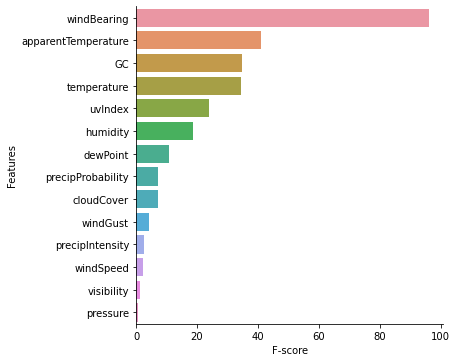

In [92]:
plt.figure(figsize = (20, 8))
ax = sns.catplot(x=feature_ranking.columns[0], y=[index for index in feature_ranking.index],
                 data=feature_ranking, kind="bar", legend=False)
ax.set(xlabel='F-score', ylabel='Features')
plt.show()

### RandomForest Model

In [93]:
from sklearn.ensemble import RandomForestRegressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, Y_train)

RandomForestRegressor(random_state=42)

In [94]:
print(" ")

print("RF_train score : {}".format(rf_regressor.score(X_train, Y_train)))
print(" ")
print("RF_test score : {}".format(rf_regressor.score(X_test, Y_test)))

 
RF_train score : 0.9129847575900325
 
RF_test score : 0.5743983529454286


In [95]:
from sklearn.model_selection import GridSearchCV
rf_regressor_grid = RandomForestRegressor()
params = {"n_estimators": range(70, 200, 10),
          "max_depth" : range(9, 30),
          "max_features" : range(5, 10)
          }

regressor = GridSearchCV(cv=10, estimator = rf_regressor_grid, param_grid = params, n_jobs=-1, verbose=3).fit(X_train, Y_train)

Fitting 10 folds for each of 1365 candidates, totalling 13650 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:   10.1s
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:   23.4s
[Parallel(n_jobs=-1)]: Done 496 tasks      | elapsed:   43.7s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 1136 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 1552 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 2032 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 2576 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 3184 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done 3856 tasks      | elapsed:  6.4min
[Parallel(n_jobs=-1)]: Done 4592 tasks      | elapsed:  7.7min
[Parallel(n_jobs=-1)]: Done 5392 tasks      | elapsed:  9.1min
[Parallel(n_jobs=-1)]: Done 6256 tasks      | elapsed: 10.7min
[Parallel(n_jobs=-1)]: Done 7184 tasks      | e

In [97]:
regressor.best_params_

{'max_depth': 14, 'max_features': 9, 'n_estimators': 90}

In [98]:
regressor.best_estimator_.score(X_train, Y_train)

0.9109054176715585

In [99]:
regressor.best_estimator_.score(X_test, Y_test)

0.587830049091541

### XGboost Model 

In [100]:
!pip install xgboost

In [101]:
from xgboost import XGBRegressor
regressor_xgb = XGBRegressor()
regressor_xgb.fit(X_train, Y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [102]:
regressor_xgb.score(X_train, Y_train)

0.9557407318055511

In [103]:
regressor_xgb.score(X_test, Y_test)

0.564376480524975